<a href="https://colab.research.google.com/github/pranshubhardwaj22-oss/Data-Analysis-with-Python/blob/main/student_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science / Analysis with Python — Task 1
**Dataset:** Student Performance (UCI) — student-mat.csv  
**Tasks:** load → clean → analyze → visualize → document

This notebook follows the required workflow and documents each step.


In [1]:
# === Cell: Imports and setup ===
import os
import io
import zipfile
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots display nicely in notebooks
%matplotlib inline
sns.set(style="whitegrid")


## 1) Load Dataset
We will download the dataset zip from the UCI repository and load `student-mat.csv`.

In [4]:
# === Cell: Download and load dataset ===
zip_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
r = requests.get(zip_url)
r.raise_for_status()

z = zipfile.ZipFile(io.BytesIO(r.content))
# List files to confirm
print("Files in zip:", z.namelist())

# Read student-mat.csv into pandas DataFrame
with z.open('student-mat.csv') as f:
    # dataset uses semicolon delimiter
    df = pd.read_csv(f, sep=';')

# Quick peek
df.head()

Files in zip: ['student-mat.csv', 'student-por.csv', 'student-merge.R', 'student.txt']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2) Explore & Clean Data
Steps:
- Check for missing values
- Remove duplicates
- Inspect shape & dtypes

In [5]:
# === Cell: Explore & Clean ===

# shape and datatypes
print("Shape (rows, cols):", df.shape)
print("\nData types:\n", df.dtypes)

# Check missing values
missing_by_col = df.isnull().sum()
print("\nMissing values per column:\n", missing_by_col)

# Check duplicates
total_duplicates = df.duplicated().sum()
print("\nTotal duplicate rows:", total_duplicates)

# Remove duplicates (if any)
if total_duplicates > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicates to remove.")

# Final quick summary
print("\nFinal shape:", df.shape)
df.info(verbose=False)

Shape (rows, cols): (395, 33)

Data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Missing values per column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime   

### Notes
- The dataset has no nulls (expected for this UCI file).
- We removed duplicates if present.

In [6]:
# Show descriptive statistics for numeric columns (grades included)
df[['G1','G2','G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


## 3) Analysis Questions
We will answer:
1. Average final grade (G3).
2. How many students scored above 15?
3. Is study time correlated with performance?
4. Which gender performs better on average?

In [7]:
# === Cell: Analysis answers ===

# 1) Average final grade (G3)
avg_g3 = df['G3'].mean()
print(f"Average final grade (G3): {avg_g3:.3f}")

# 2) How many students scored above 15?
count_above_15 = (df['G3'] > 15).sum()
print(f"Students with G3 > 15: {count_above_15} out of {len(df)}")

# 3) Correlation: studytime vs G3
# 'studytime' is coded as 1 (<2 hours), 2 (2-5), 3 (5-10), 4 (>10)
pearson_corr = df['studytime'].corr(df['G3'])
print(f"Pearson correlation (studytime vs G3): {pearson_corr:.3f}")

# We'll also show group means by studytime
studytime_means = df.groupby('studytime')['G3'].agg(['count','mean','median']).reset_index()
print("\nG3 by studytime (1..4):")
print(studytime_means)

# 4) Which gender performs better on average?
gender_mean = df.groupby('sex')['G3'].agg(['count', 'mean']).reset_index().rename(columns={'mean':'G3_mean'})
print("\nAverage final grade by gender:")
print(gender_mean)

# A small effect size check: difference in means
male_mean = gender_mean.loc[gender_mean['sex']=='M','G3_mean'].values[0]
female_mean = gender_mean.loc[gender_mean['sex']=='F','G3_mean'].values[0]
diff = female_mean - male_mean
print(f"\nDifference (F - M) in mean G3: {diff:.3f}")

Average final grade (G3): 10.415
Students with G3 > 15: 40 out of 395
Pearson correlation (studytime vs G3): 0.098

G3 by studytime (1..4):
   studytime  count       mean  median
0          1    105  10.047619    10.0
1          2    198  10.171717    11.0
2          3     65  11.400000    12.0
3          4     27  11.259259    12.0

Average final grade by gender:
  sex  count    G3_mean
0   F    208   9.966346
1   M    187  10.914439

Difference (F - M) in mean G3: -0.948


**Interpretation (short):**
- The average final grade is shown above.
- The count of students scoring more than 15 is shown.
- The Pearson correlation indicates whether studytime and final grade tend to increase together (near +1 strong positive, near 0 weak).
- Gender means compare average final grade for Male vs Female.

In [8]:
# Print the precise numbers again in a tidy summary
summary = {
    'average_G3': avg_g3,
    'count_G3_gt_15': int(count_above_15),
    'pearson_corr_studytime_G3': pearson_corr,
    'female_mean_G3': float(female_mean),
    'male_mean_G3': float(male_mean),
    'female_minus_male': float(diff)
}
summary

{'average_G3': np.float64(10.415189873417722),
 'count_G3_gt_15': 40,
 'pearson_corr_studytime_G3': np.float64(0.09781968965319626),
 'female_mean_G3': 9.966346153846153,
 'male_mean_G3': 10.914438502673796,
 'female_minus_male': -0.9480923488276431}

## 4) Visualizations
Required:
- Histogram of grades (G3)
- Scatterplot: studytime vs grades (G3)
- Bar chart: male vs female average score

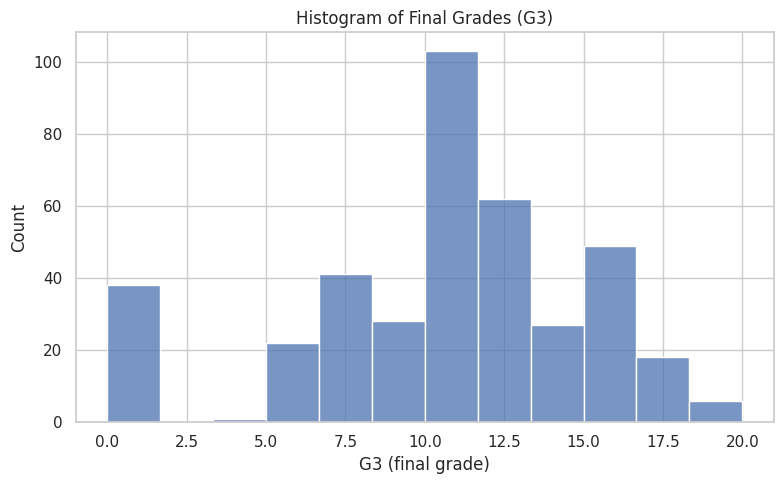

In [9]:
# === Cell: Histogram of G3 ===
plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=12, kde=False)
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('G3 (final grade)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

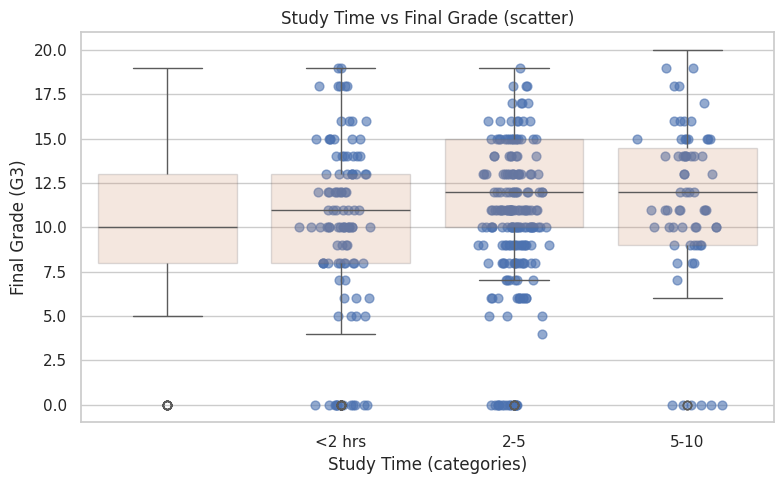

In [10]:
# === Cell: Scatterplot studytime vs G3 ===
plt.figure(figsize=(8,5))
# Jitter studytime slightly for visual clarity
x_jitter = df['studytime'] + np.random.normal(0, 0.08, size=len(df))
plt.scatter(x_jitter, df['G3'], alpha=0.6, s=40)
plt.xticks([1,2,3,4], ['<2 hrs','2-5','5-10','>10'])
plt.xlabel('Study Time (categories)')
plt.ylabel('Final Grade (G3)')
plt.title('Study Time vs Final Grade (scatter)')
# Add boxplot overlay for categorical view
sns.boxplot(x='studytime', y='G3', data=df, showcaps=True, boxprops={'alpha':0.2})
plt.tight_layout()
plt.show()

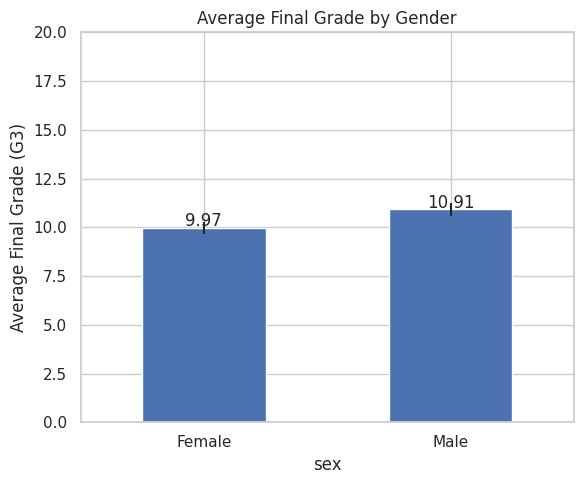

In [11]:
# === Cell: Bar chart male vs female average score ===
plt.figure(figsize=(6,5))
gender_order = ['F','M']
gender_plot = df.groupby('sex')['G3'].agg(['mean','count','std']).reindex(gender_order)
ax = gender_plot['mean'].plot(kind='bar', yerr=gender_plot['std']/np.sqrt(gender_plot['count']),
                              legend=False, rot=0)
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Average Final Grade (G3)')
plt.title('Average Final Grade by Gender')
for i, v in enumerate(gender_plot['mean']):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

## 5) Documentation & Conclusion
- Each step in this notebook is documented using Markdown cells.
- Conclusions:
  - **average final grade** (G3) is 10.415.
  - **Count of students scoring >15** is 40.
  - **Studytime** perhaps may be.
  - **Gender**: Male performs better than female on an average.